# Data preprocessing 
### Data understanding & gathering info 

In [234]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import ast
import seaborn as sns

In [235]:
df=pd.read_csv("googleplaystore.csv")

In [236]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [237]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [238]:
df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


# Fixing Dtypes Problems:
### - reviews to int
### - prices to int
### - genres to list
### - last_updated to date_time 

In [239]:
df.sample(1)                             

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
3448,2018Emoji Keyboard 😂 Emoticons Lite -sticker&gif,PERSONALIZATION,4.2,115773,Varies with device,"10,000,000+",Free,0,Everyone,Personalization,"May 22, 2018",Varies with device,4.1 and up


Dropping dups at first

In [240]:
df.drop_duplicates(inplace=True)

In [241]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10358 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10358 non-null  object 
 1   Category        10358 non-null  object 
 2   Rating          8893 non-null   float64
 3   Reviews         10358 non-null  object 
 4   Size            10358 non-null  object 
 5   Installs        10358 non-null  object 
 6   Type            10357 non-null  object 
 7   Price           10358 non-null  object 
 8   Content Rating  10357 non-null  object 
 9   Genres          10358 non-null  object 
 10  Last Updated    10358 non-null  object 
 11  Current Ver     10350 non-null  object 
 12  Android Ver     10355 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [242]:
df['Reviews']=pd.to_numeric(df['Reviews'],errors='coerce')

In [243]:
df.describe()

,Rating,Reviews
count,8893.000000,1.035700e+04
mean,4.189542,4.059046e+05
std,0.545452,2.696778e+06
min,1.000000,0.000000e+00
25%,4.000000,3.200000e+01
50%,4.300000,1.680000e+03
75%,4.500000,4.641600e+04
max,19.000000,7.815831e+07


In [244]:
df.Price=df.Price.replace('0',0)
def change_price(num):
    if num==0 :
        return num
    elif '$' in num:
        num=num.replace("$","")
        return float(num)
    else :
        return np.nan
df.Price=df.Price.apply(change_price)
df.Price.unique()

array([  0.  ,   4.99,   3.99,   6.99,   1.49,   2.99,   7.99,   5.99,
         3.49,   1.99,   9.99,   7.49,   0.99,   9.  ,   5.49,  10.  ,
        24.99,  11.99,  79.99,  16.99,  14.99,   1.  ,  29.99,  12.99,
         2.49,  10.99,   1.5 ,  19.99,  15.99,  33.99,  74.99,  39.99,
         3.95,   4.49,   1.7 ,   8.99,   2.  ,   3.88,  25.99, 399.99,
        17.99, 400.  ,   3.02,   1.76,   4.84,   4.77,   1.61,   2.5 ,
         1.59,   6.49,   1.29,   5.  ,  13.99, 299.99, 379.99,  37.99,
        18.99, 389.99,  19.9 ,   8.49,   1.75,  14.  ,   4.85,  46.99,
       109.99, 154.99,   3.08,   2.59,   4.8 ,   1.96,  19.4 ,   3.9 ,
         4.59,  15.46,   3.04,   4.29,   2.6 ,   3.28,   4.6 ,  28.99,
         2.95,   2.9 ,   1.97, 200.  ,  89.99,   2.56,  30.99,   3.61,
       394.99,   1.26,    nan,   1.2 ,   1.04])

In [245]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10358 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10358 non-null  object 
 1   Category        10358 non-null  object 
 2   Rating          8893 non-null   float64
 3   Reviews         10357 non-null  float64
 4   Size            10358 non-null  object 
 5   Installs        10358 non-null  object 
 6   Type            10357 non-null  object 
 7   Price           10357 non-null  float64
 8   Content Rating  10357 non-null  object 
 9   Genres          10358 non-null  object 
 10  Last Updated    10358 non-null  object 
 11  Current Ver     10350 non-null  object 
 12  Android Ver     10355 non-null  object 
dtypes: float64(3), object(10)
memory usage: 1.1+ MB


In [246]:
df.Price.value_counts()

Price
0.00      9592
0.99       146
2.99       125
1.99        73
4.99        70
          ... 
389.99       1
19.90        1
1.75         1
14.00        1
1.04         1
Name: count, Length: 92, dtype: int64

In [247]:
df['Last Updated']=pd.to_datetime(df['Last Updated'],errors='coerce')

In [248]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10358 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             10358 non-null  object        
 1   Category        10358 non-null  object        
 2   Rating          8893 non-null   float64       
 3   Reviews         10357 non-null  float64       
 4   Size            10358 non-null  object        
 5   Installs        10358 non-null  object        
 6   Type            10357 non-null  object        
 7   Price           10357 non-null  float64       
 8   Content Rating  10357 non-null  object        
 9   Genres          10358 non-null  object        
 10  Last Updated    10357 non-null  datetime64[ns]
 11  Current Ver     10350 non-null  object        
 12  Android Ver     10355 non-null  object        
dtypes: datetime64[ns](1), float64(3), object(9)
memory usage: 1.1+ MB


In [249]:
df.Genres=list(df.Genres.str.split(';'))

In [250]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10358 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             10358 non-null  object        
 1   Category        10358 non-null  object        
 2   Rating          8893 non-null   float64       
 3   Reviews         10357 non-null  float64       
 4   Size            10358 non-null  object        
 5   Installs        10358 non-null  object        
 6   Type            10357 non-null  object        
 7   Price           10357 non-null  float64       
 8   Content Rating  10357 non-null  object        
 9   Genres          10358 non-null  object        
 10  Last Updated    10357 non-null  datetime64[ns]
 11  Current Ver     10350 non-null  object        
 12  Android Ver     10355 non-null  object        
dtypes: datetime64[ns](1), float64(3), object(9)
memory usage: 1.1+ MB


In [251]:
df.Genres

0                      [Art & Design]
1        [Art & Design, Pretend Play]
2                      [Art & Design]
3                      [Art & Design]
4          [Art & Design, Creativity]
                     ...             
10836                     [Education]
10837                     [Education]
10838                       [Medical]
10839             [Books & Reference]
10840                     [Lifestyle]
Name: Genres, Length: 10358, dtype: object

# Reformatting Category and Size cols

In [252]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19M,"10,000+",Free,0.0,Everyone,[Art & Design],2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14M,"500,000+",Free,0.0,Everyone,"[Art & Design, Pretend Play]",2018-01-15,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8.7M,"5,000,000+",Free,0.0,Everyone,[Art & Design],2018-08-01,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25M,"50,000,000+",Free,0.0,Teen,[Art & Design],2018-06-08,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2.8M,"100,000+",Free,0.0,Everyone,"[Art & Design, Creativity]",2018-06-20,1.1,4.4 and up


In [253]:
df.Category=df.Category.str.replace("_AND_"," & ")

In [254]:
df.Category=df.Category.str.title()

In [255]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10358 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             10358 non-null  object        
 1   Category        10358 non-null  object        
 2   Rating          8893 non-null   float64       
 3   Reviews         10357 non-null  float64       
 4   Size            10358 non-null  object        
 5   Installs        10358 non-null  object        
 6   Type            10357 non-null  object        
 7   Price           10357 non-null  float64       
 8   Content Rating  10357 non-null  object        
 9   Genres          10358 non-null  object        
 10  Last Updated    10357 non-null  datetime64[ns]
 11  Current Ver     10350 non-null  object        
 12  Android Ver     10355 non-null  object        
dtypes: datetime64[ns](1), float64(3), object(9)
memory usage: 1.1+ MB


In [256]:
df.head()


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,Art & Design,4.1,159.0,19M,"10,000+",Free,0.0,Everyone,[Art & Design],2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,Art & Design,3.9,967.0,14M,"500,000+",Free,0.0,Everyone,"[Art & Design, Pretend Play]",2018-01-15,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",Art & Design,4.7,87510.0,8.7M,"5,000,000+",Free,0.0,Everyone,[Art & Design],2018-08-01,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,Art & Design,4.5,215644.0,25M,"50,000,000+",Free,0.0,Teen,[Art & Design],2018-06-08,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,Art & Design,4.3,967.0,2.8M,"100,000+",Free,0.0,Everyone,"[Art & Design, Creativity]",2018-06-20,1.1,4.4 and up


In [257]:
df.Size.unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

In [258]:
# See all unique values that contain 'G' or 'g'
print("Original values containing 'G':")
g_values = df['Size'][df['Size'].str.contains('G', case=False, na=False)].unique()
print(g_values)

# See how many there are
print(f"\nNumber of values containing 'G': {len(g_values)}")

# Also check for any other unexpected patterns
print("\nSample of original Size values:")
print(df['Size'].dropna().sample(10).values)  # Print 10 random non-null values

Original values containing 'G':
[]

Number of values containing 'G': 0

Sample of original Size values:
['8.2M' '12M' '3.6M' '13M' '48M' 'Varies with device' '4.0M' '8.5M' '21M'
 '10M']


In [259]:

def size_in_mega_bytes(st):
    if st=='Varies with device':
        return np.nan
    elif st[-1]=='M': 
        return float(st.replace("M",""))
    elif st[-1]=='K': 
        return float(st.replace("K",""))/1024
    else:
        return np.nan
df.Size=df.Size.apply(size_in_mega_bytes)

In [260]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10358 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             10358 non-null  object        
 1   Category        10358 non-null  object        
 2   Rating          8893 non-null   float64       
 3   Reviews         10357 non-null  float64       
 4   Size            8516 non-null   float64       
 5   Installs        10358 non-null  object        
 6   Type            10357 non-null  object        
 7   Price           10357 non-null  float64       
 8   Content Rating  10357 non-null  object        
 9   Genres          10358 non-null  object        
 10  Last Updated    10357 non-null  datetime64[ns]
 11  Current Ver     10350 non-null  object        
 12  Android Ver     10355 non-null  object        
dtypes: datetime64[ns](1), float64(4), object(8)
memory usage: 1.1+ MB


In [261]:
df.describe()

,Rating,Reviews,Size,Price,Last Updated
count,8893.000000,1.035700e+04,8516.000000,10357.000000,10357
mean,4.189542,4.059046e+05,22.058607,1.030800,2017-11-14 09:25:19.320266496
min,1.000000,0.000000e+00,1.000000,0.000000,2010-05-21 00:00:00
25%,4.000000,3.200000e+01,5.300000,0.000000,2017-09-03 00:00:00
50%,4.300000,1.680000e+03,14.000000,0.000000,2018-05-20 00:00:00
75%,4.500000,4.641600e+04,30.000000,0.000000,2018-07-19 00:00:00
max,19.000000,7.815831e+07,100.000000,400.000000,2018-08-08 00:00:00
std,0.545452,2.696778e+06,22.587500,16.278625,NaN


In [262]:
df.Size=pd.to_numeric(df.Size,errors='coerce')

In [263]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10358 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             10358 non-null  object        
 1   Category        10358 non-null  object        
 2   Rating          8893 non-null   float64       
 3   Reviews         10357 non-null  float64       
 4   Size            8516 non-null   float64       
 5   Installs        10358 non-null  object        
 6   Type            10357 non-null  object        
 7   Price           10357 non-null  float64       
 8   Content Rating  10357 non-null  object        
 9   Genres          10358 non-null  object        
 10  Last Updated    10357 non-null  datetime64[ns]
 11  Current Ver     10350 non-null  object        
 12  Android Ver     10355 non-null  object        
dtypes: datetime64[ns](1), float64(4), object(8)
memory usage: 1.1+ MB


In [264]:
df[(df.Type=='Free') & (df.Price!=0)]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [265]:
df.sample()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
5728,DEER HUNTER 2018,Game,4.3,955614.0,82.0,"10,000,000+",Free,0.0,Teen,[Action],2018-06-26,5.1.2,3.0 and up


# Reformatting Android ver column into min android version

In [266]:
df['Android Ver']

0              4.0.3 and up
1              4.0.3 and up
2              4.0.3 and up
3                4.2 and up
4                4.4 and up
                ...        
10836            4.1 and up
10837            4.1 and up
10838            2.2 and up
10839    Varies with device
10840    Varies with device
Name: Android Ver, Length: 10358, dtype: object

In [267]:
def split_str(st):
    st=str(st)
    ls=list(st.split(" "))
    if ls[0]!='Varies':
        var=ls[0].split(".")
        if len(var)==2 :
            return f'{var[0]}.{var[1]}.0'
        else:
            return ls[0]
    else:
        return pd.NA      
df['Min Android version']=df['Android Ver'].apply(split_str)

In [268]:
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Min Android version
0,Photo Editor & Candy Camera & Grid & ScrapBook,Art & Design,4.1,159.0,19.0,"10,000+",Free,0.0,Everyone,[Art & Design],2018-01-07,1.0.0,4.0.3 and up,4.0.3
1,Coloring book moana,Art & Design,3.9,967.0,14.0,"500,000+",Free,0.0,Everyone,"[Art & Design, Pretend Play]",2018-01-15,2.0.0,4.0.3 and up,4.0.3
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",Art & Design,4.7,87510.0,8.7,"5,000,000+",Free,0.0,Everyone,[Art & Design],2018-08-01,1.2.4,4.0.3 and up,4.0.3
3,Sketch - Draw & Paint,Art & Design,4.5,215644.0,25.0,"50,000,000+",Free,0.0,Teen,[Art & Design],2018-06-08,Varies with device,4.2 and up,4.2.0
4,Pixel Draw - Number Art Coloring Book,Art & Design,4.3,967.0,2.8,"100,000+",Free,0.0,Everyone,"[Art & Design, Creativity]",2018-06-20,1.1,4.4 and up,4.4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,Family,4.5,38.0,53.0,"5,000+",Free,0.0,Everyone,[Education],2017-07-25,1.48,4.1 and up,4.1.0
10837,Fr. Mike Schmitz Audio Teachings,Family,5.0,4.0,3.6,100+,Free,0.0,Everyone,[Education],2018-07-06,1.0,4.1 and up,4.1.0
10838,Parkinson Exercices FR,Medical,NaN,3.0,9.5,"1,000+",Free,0.0,Everyone,[Medical],2017-01-20,1.0,2.2 and up,2.2.0
10839,The SCP Foundation DB fr nn5n,Books & Reference,4.5,114.0,NaN,"1,000+",Free,0.0,Mature 17+,[Books & Reference],2015-01-19,Varies with device,Varies with device,<NA>


In [269]:
df.drop(labels='Android Ver',axis=1,inplace=True)

In [270]:
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Min Android version
0,Photo Editor & Candy Camera & Grid & ScrapBook,Art & Design,4.1,159.0,19.0,"10,000+",Free,0.0,Everyone,[Art & Design],2018-01-07,1.0.0,4.0.3
1,Coloring book moana,Art & Design,3.9,967.0,14.0,"500,000+",Free,0.0,Everyone,"[Art & Design, Pretend Play]",2018-01-15,2.0.0,4.0.3
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",Art & Design,4.7,87510.0,8.7,"5,000,000+",Free,0.0,Everyone,[Art & Design],2018-08-01,1.2.4,4.0.3
3,Sketch - Draw & Paint,Art & Design,4.5,215644.0,25.0,"50,000,000+",Free,0.0,Teen,[Art & Design],2018-06-08,Varies with device,4.2.0
4,Pixel Draw - Number Art Coloring Book,Art & Design,4.3,967.0,2.8,"100,000+",Free,0.0,Everyone,"[Art & Design, Creativity]",2018-06-20,1.1,4.4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,Family,4.5,38.0,53.0,"5,000+",Free,0.0,Everyone,[Education],2017-07-25,1.48,4.1.0
10837,Fr. Mike Schmitz Audio Teachings,Family,5.0,4.0,3.6,100+,Free,0.0,Everyone,[Education],2018-07-06,1.0,4.1.0
10838,Parkinson Exercices FR,Medical,NaN,3.0,9.5,"1,000+",Free,0.0,Everyone,[Medical],2017-01-20,1.0,2.2.0
10839,The SCP Foundation DB fr nn5n,Books & Reference,4.5,114.0,NaN,"1,000+",Free,0.0,Mature 17+,[Books & Reference],2015-01-19,Varies with device,<NA>


# Detecting Outliers

In [271]:
df.isna().sum()

App                       0
Category                  0
Rating                 1465
Reviews                   1
Size                   1842
Installs                  0
Type                      1
Price                     1
Content Rating            1
Genres                    0
Last Updated              1
Current Ver               8
Min Android version    1221
dtype: int64

In [272]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10358 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   App                  10358 non-null  object        
 1   Category             10358 non-null  object        
 2   Rating               8893 non-null   float64       
 3   Reviews              10357 non-null  float64       
 4   Size                 8516 non-null   float64       
 5   Installs             10358 non-null  object        
 6   Type                 10357 non-null  object        
 7   Price                10357 non-null  float64       
 8   Content Rating       10357 non-null  object        
 9   Genres               10358 non-null  object        
 10  Last Updated         10357 non-null  datetime64[ns]
 11  Current Ver          10350 non-null  object        
 12  Min Android version  9137 non-null   object        
dtypes: datetime64[ns](1), float64(4), ob

In [273]:
from datasist.structdata import detect_outliers

In [274]:
cols=df.select_dtypes(['int64','float64']).columns.tolist()
cols

['Rating', 'Reviews', 'Size', 'Price']

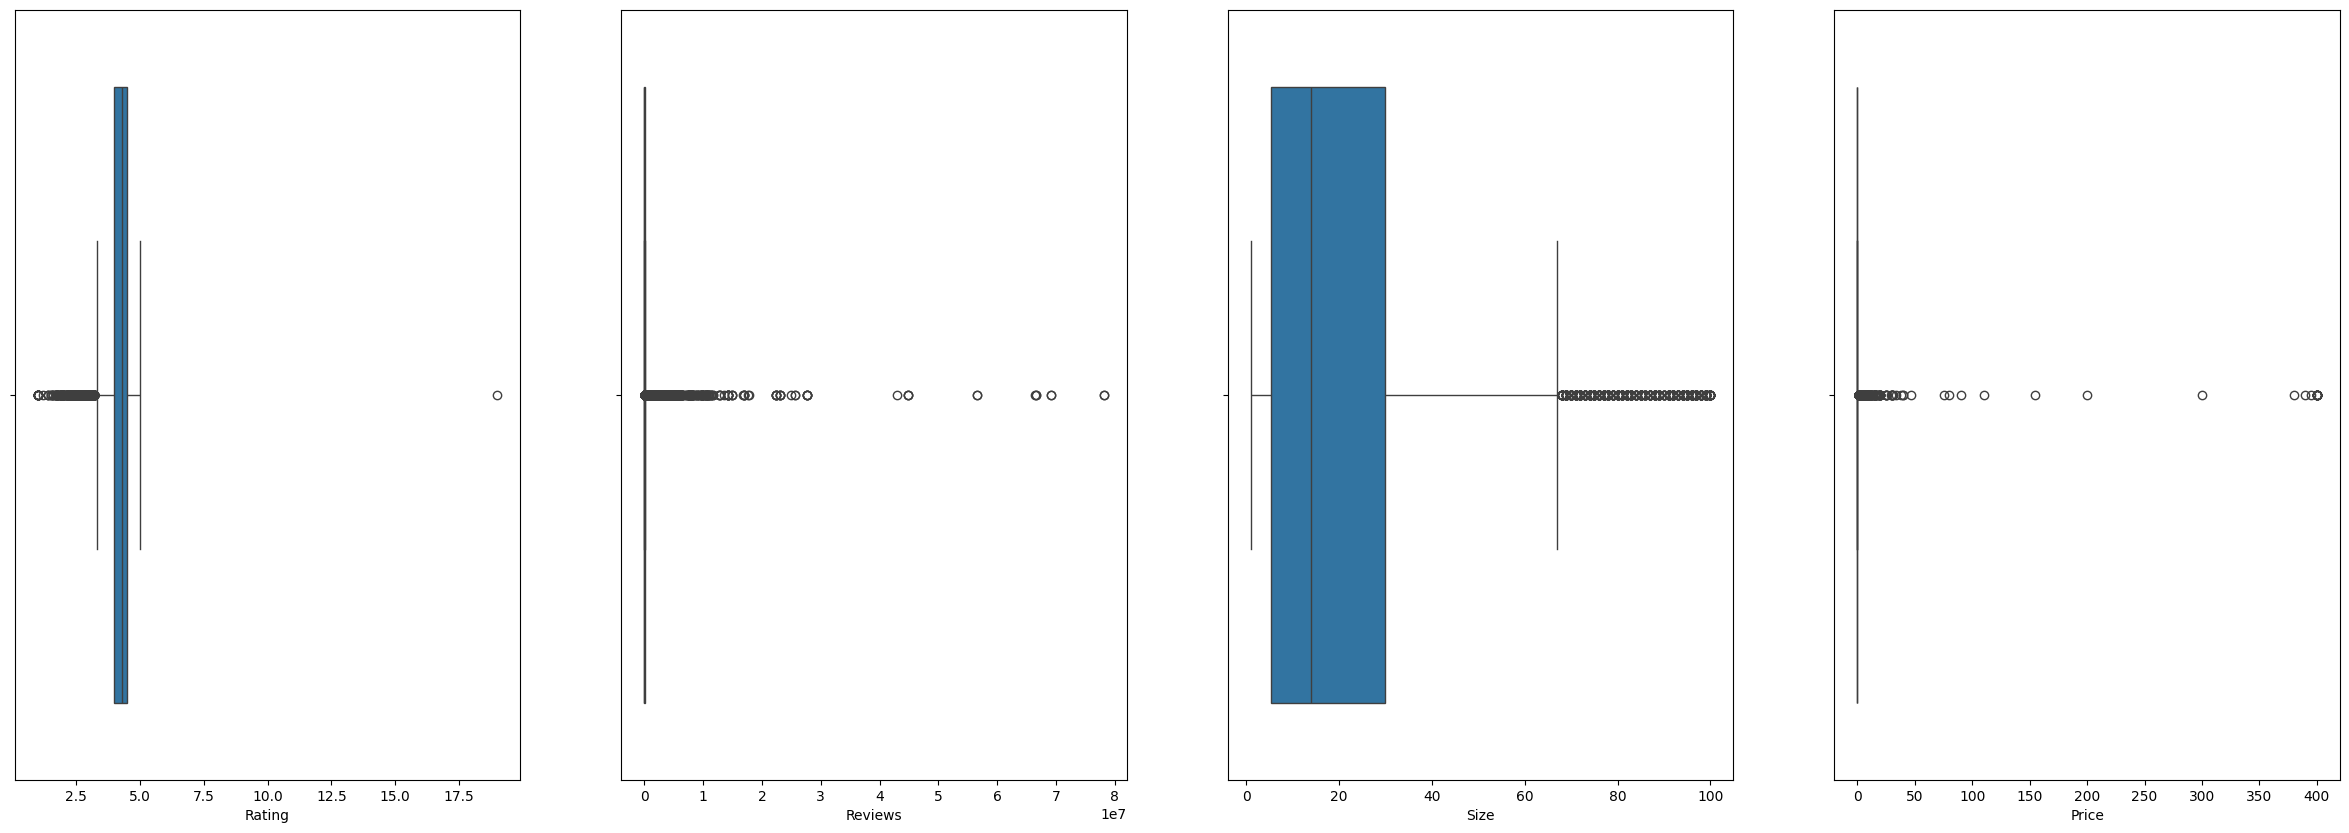

In [275]:
fig ,[ax0,ax1,ax2,ax3]=plt.subplots(nrows=1,ncols=4,figsize=[30,10])
for col,ax_n in zip(cols,[ax0,ax1,ax2,ax3]):
    sns.boxplot(x=col,data=df,ax=ax_n)

# Issue : no outliers detected ???

In [276]:

outliers_index=detect_outliers(data=df,n=0,features=cols)
outliers_index

[]

In [277]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10358 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   App                  10358 non-null  object        
 1   Category             10358 non-null  object        
 2   Rating               8893 non-null   float64       
 3   Reviews              10357 non-null  float64       
 4   Size                 8516 non-null   float64       
 5   Installs             10358 non-null  object        
 6   Type                 10357 non-null  object        
 7   Price                10357 non-null  float64       
 8   Content Rating       10357 non-null  object        
 9   Genres               10358 non-null  object        
 10  Last Updated         10357 non-null  datetime64[ns]
 11  Current Ver          10350 non-null  object        
 12  Min Android version  9137 non-null   object        
dtypes: datetime64[ns](1), float64(4), ob

In [278]:
cols

['Rating', 'Reviews', 'Size', 'Price']

# since the detect_outliers is not working i am going to do my own version

In [279]:
def Replace_outliers(df,col):
    """
    This function detects outliers and replaces them with np.nan

    """
    Q1=df[col].quantile(0.25)
    Q3=df[col].quantile(0.75)
    IQR=Q3-Q1
    upper_bound=Q3+1.5*IQR
    lowerbound=Q1-1.5*IQR
    df.loc[(df[col]>upper_bound ) | (df[col]<lowerbound),col]=np.nan



# replace each column outliers with na 

In [280]:
df['Reviews'].mean()

405904.6106015255

In [281]:
df2=df.copy()
for col in cols:
    Replace_outliers(df2,col)


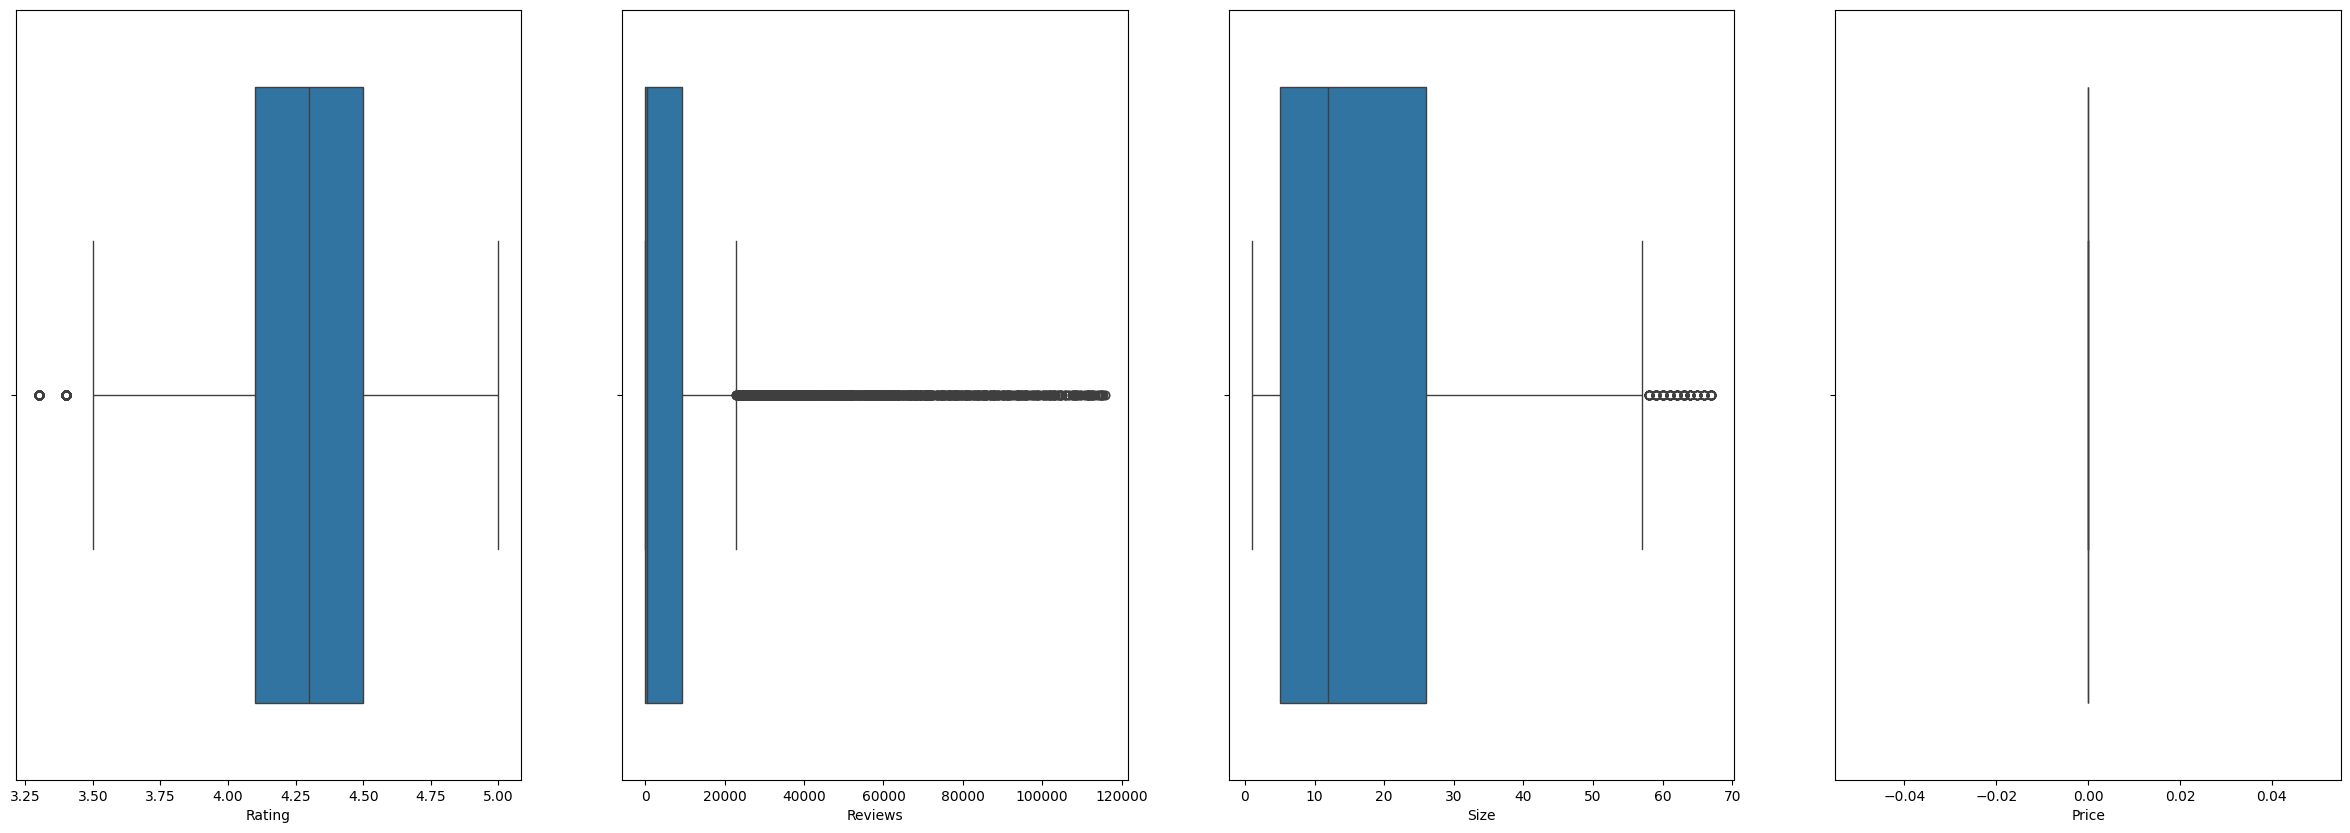

In [282]:
fig ,[ax0,ax1,ax2,ax3]=plt.subplots(nrows=1,ncols=4,figsize=[30,10])
for col,ax_n in zip(cols,[ax0,ax1,ax2,ax3]):
    sns.boxplot(x=col,data=df2,ax=ax_n)

# -- after removing outliers i detected that all the price data was removed as more than 95% of the data was 0, so i should't have removed them, that's why i used df2 

# -- now i am going do to the same on the original df but without including the price column

In [283]:
cols.remove('Price')

In [284]:

for col in cols:
    Replace_outliers(df,col)


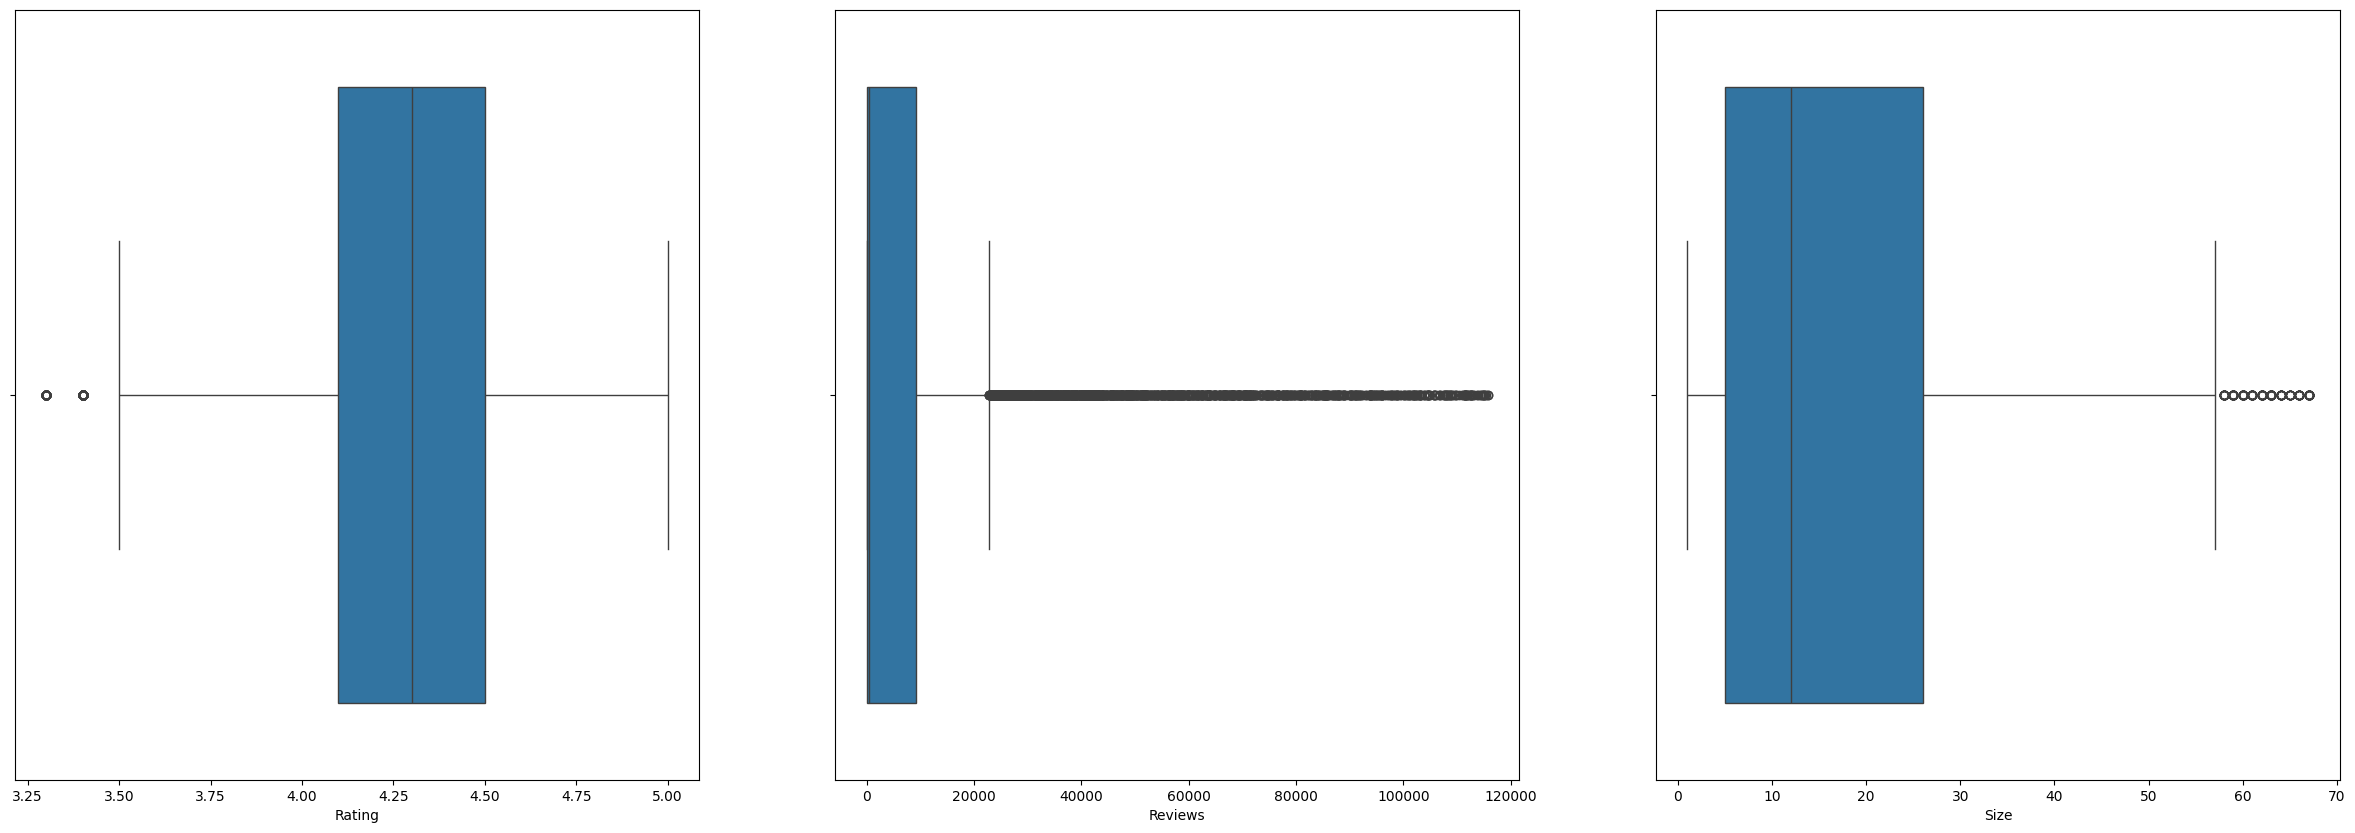

In [285]:
fig ,[ax0,ax1,ax2]=plt.subplots(nrows=1,ncols=3,figsize=[30,10])
for col,ax_n in zip(cols,[ax0,ax1,ax2]):
    sns.boxplot(x=col,data=df,ax=ax_n)

# Filling Data using Simple Imputer

# First: Numerical Data

In [286]:
cols.append('Price')

In [287]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(strategy='mean')
for col in cols:
    df[col]=imputer.fit_transform(df[[col]]).flatten()


In [288]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10358 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   App                  10358 non-null  object        
 1   Category             10358 non-null  object        
 2   Rating               10358 non-null  float64       
 3   Reviews              10358 non-null  float64       
 4   Size                 10358 non-null  float64       
 5   Installs             10358 non-null  object        
 6   Type                 10357 non-null  object        
 7   Price                10358 non-null  float64       
 8   Content Rating       10357 non-null  object        
 9   Genres               10358 non-null  object        
 10  Last Updated         10357 non-null  datetime64[ns]
 11  Current Ver          10350 non-null  object        
 12  Min Android version  9137 non-null   object        
dtypes: datetime64[ns](1), float64(4), ob

pd.Na isn't compatable with SimpleImputer

In [289]:
df['Min Android version']=df['Min Android version'].replace({pd.NA:np.nan})

# Second: Categorial Data

In [290]:
imputer=SimpleImputer(strategy='most_frequent')
df['Min Android version']=imputer.fit_transform(df[['Min Android version']]).flatten()

In [291]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10358 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   App                  10358 non-null  object        
 1   Category             10358 non-null  object        
 2   Rating               10358 non-null  float64       
 3   Reviews              10358 non-null  float64       
 4   Size                 10358 non-null  float64       
 5   Installs             10358 non-null  object        
 6   Type                 10357 non-null  object        
 7   Price                10358 non-null  float64       
 8   Content Rating       10357 non-null  object        
 9   Genres               10358 non-null  object        
 10  Last Updated         10357 non-null  datetime64[ns]
 11  Current Ver          10350 non-null  object        
 12  Min Android version  10358 non-null  object        
dtypes: datetime64[ns](1), float64(4), ob

# Number of nan values now is very small now (from 1 to 8 rows out of 10348) so I'll drop them

In [292]:
df=df.dropna()

In [293]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10348 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   App                  10348 non-null  object        
 1   Category             10348 non-null  object        
 2   Rating               10348 non-null  float64       
 3   Reviews              10348 non-null  float64       
 4   Size                 10348 non-null  float64       
 5   Installs             10348 non-null  object        
 6   Type                 10348 non-null  object        
 7   Price                10348 non-null  float64       
 8   Content Rating       10348 non-null  object        
 9   Genres               10348 non-null  object        
 10  Last Updated         10348 non-null  datetime64[ns]
 11  Current Ver          10348 non-null  object        
 12  Min Android version  10348 non-null  object        
dtypes: datetime64[ns](1), float64(4), ob

In [294]:
df.reset_index(drop=True)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Min Android version
0,Photo Editor & Candy Camera & Grid & ScrapBook,Art & Design,4.100000,159.000000,19.000000,"10,000+",Free,0.0,Everyone,[Art & Design],2018-01-07,1.0.0,4.0.3
1,Coloring book moana,Art & Design,3.900000,967.000000,14.000000,"500,000+",Free,0.0,Everyone,"[Art & Design, Pretend Play]",2018-01-15,2.0.0,4.0.3
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",Art & Design,4.700000,87510.000000,8.700000,"5,000,000+",Free,0.0,Everyone,[Art & Design],2018-08-01,1.2.4,4.0.3
3,Sketch - Draw & Paint,Art & Design,4.500000,10983.346766,25.000000,"50,000,000+",Free,0.0,Teen,[Art & Design],2018-06-08,Varies with device,4.2.0
4,Pixel Draw - Number Art Coloring Book,Art & Design,4.300000,967.000000,2.800000,"100,000+",Free,0.0,Everyone,"[Art & Design, Creativity]",2018-06-20,1.1,4.4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10343,Sya9a Maroc - FR,Family,4.500000,38.000000,53.000000,"5,000+",Free,0.0,Everyone,[Education],2017-07-25,1.48,4.1.0
10344,Fr. Mike Schmitz Audio Teachings,Family,5.000000,4.000000,3.600000,100+,Free,0.0,Everyone,[Education],2018-07-06,1.0,4.1.0
10345,Parkinson Exercices FR,Medical,4.276599,3.000000,9.500000,"1,000+",Free,0.0,Everyone,[Medical],2017-01-20,1.0,2.2.0
10346,The SCP Foundation DB fr nn5n,Books & Reference,4.500000,114.000000,17.894136,"1,000+",Free,0.0,Mature 17+,[Books & Reference],2015-01-19,Varies with device,4.1.0


In [295]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10348 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   App                  10348 non-null  object        
 1   Category             10348 non-null  object        
 2   Rating               10348 non-null  float64       
 3   Reviews              10348 non-null  float64       
 4   Size                 10348 non-null  float64       
 5   Installs             10348 non-null  object        
 6   Type                 10348 non-null  object        
 7   Price                10348 non-null  float64       
 8   Content Rating       10348 non-null  object        
 9   Genres               10348 non-null  object        
 10  Last Updated         10348 non-null  datetime64[ns]
 11  Current Ver          10348 non-null  object        
 12  Min Android version  10348 non-null  object        
dtypes: datetime64[ns](1), float64(4), ob

# Analytical Questions


1.	What is the most expensive app on the Play Store?

In [296]:
most_expensive_app = df.loc[df['Price'].idxmax()]

print(f"Most expensive app name: {most_expensive_app['App']}")
print(f"Most expensive app Category: {most_expensive_app['Category']}")
print(f"Most expensive app Price: ${most_expensive_app['Price']:,.2f}")
print(f"Most expensive app Size: {most_expensive_app['Size']} MB")



Most expensive app name: I'm Rich - Trump Edition
Most expensive app Category: Lifestyle
Most expensive app Price: $400.00
Most expensive app Size: 7.3 MB


2.	Which genre has the highest number of apps?


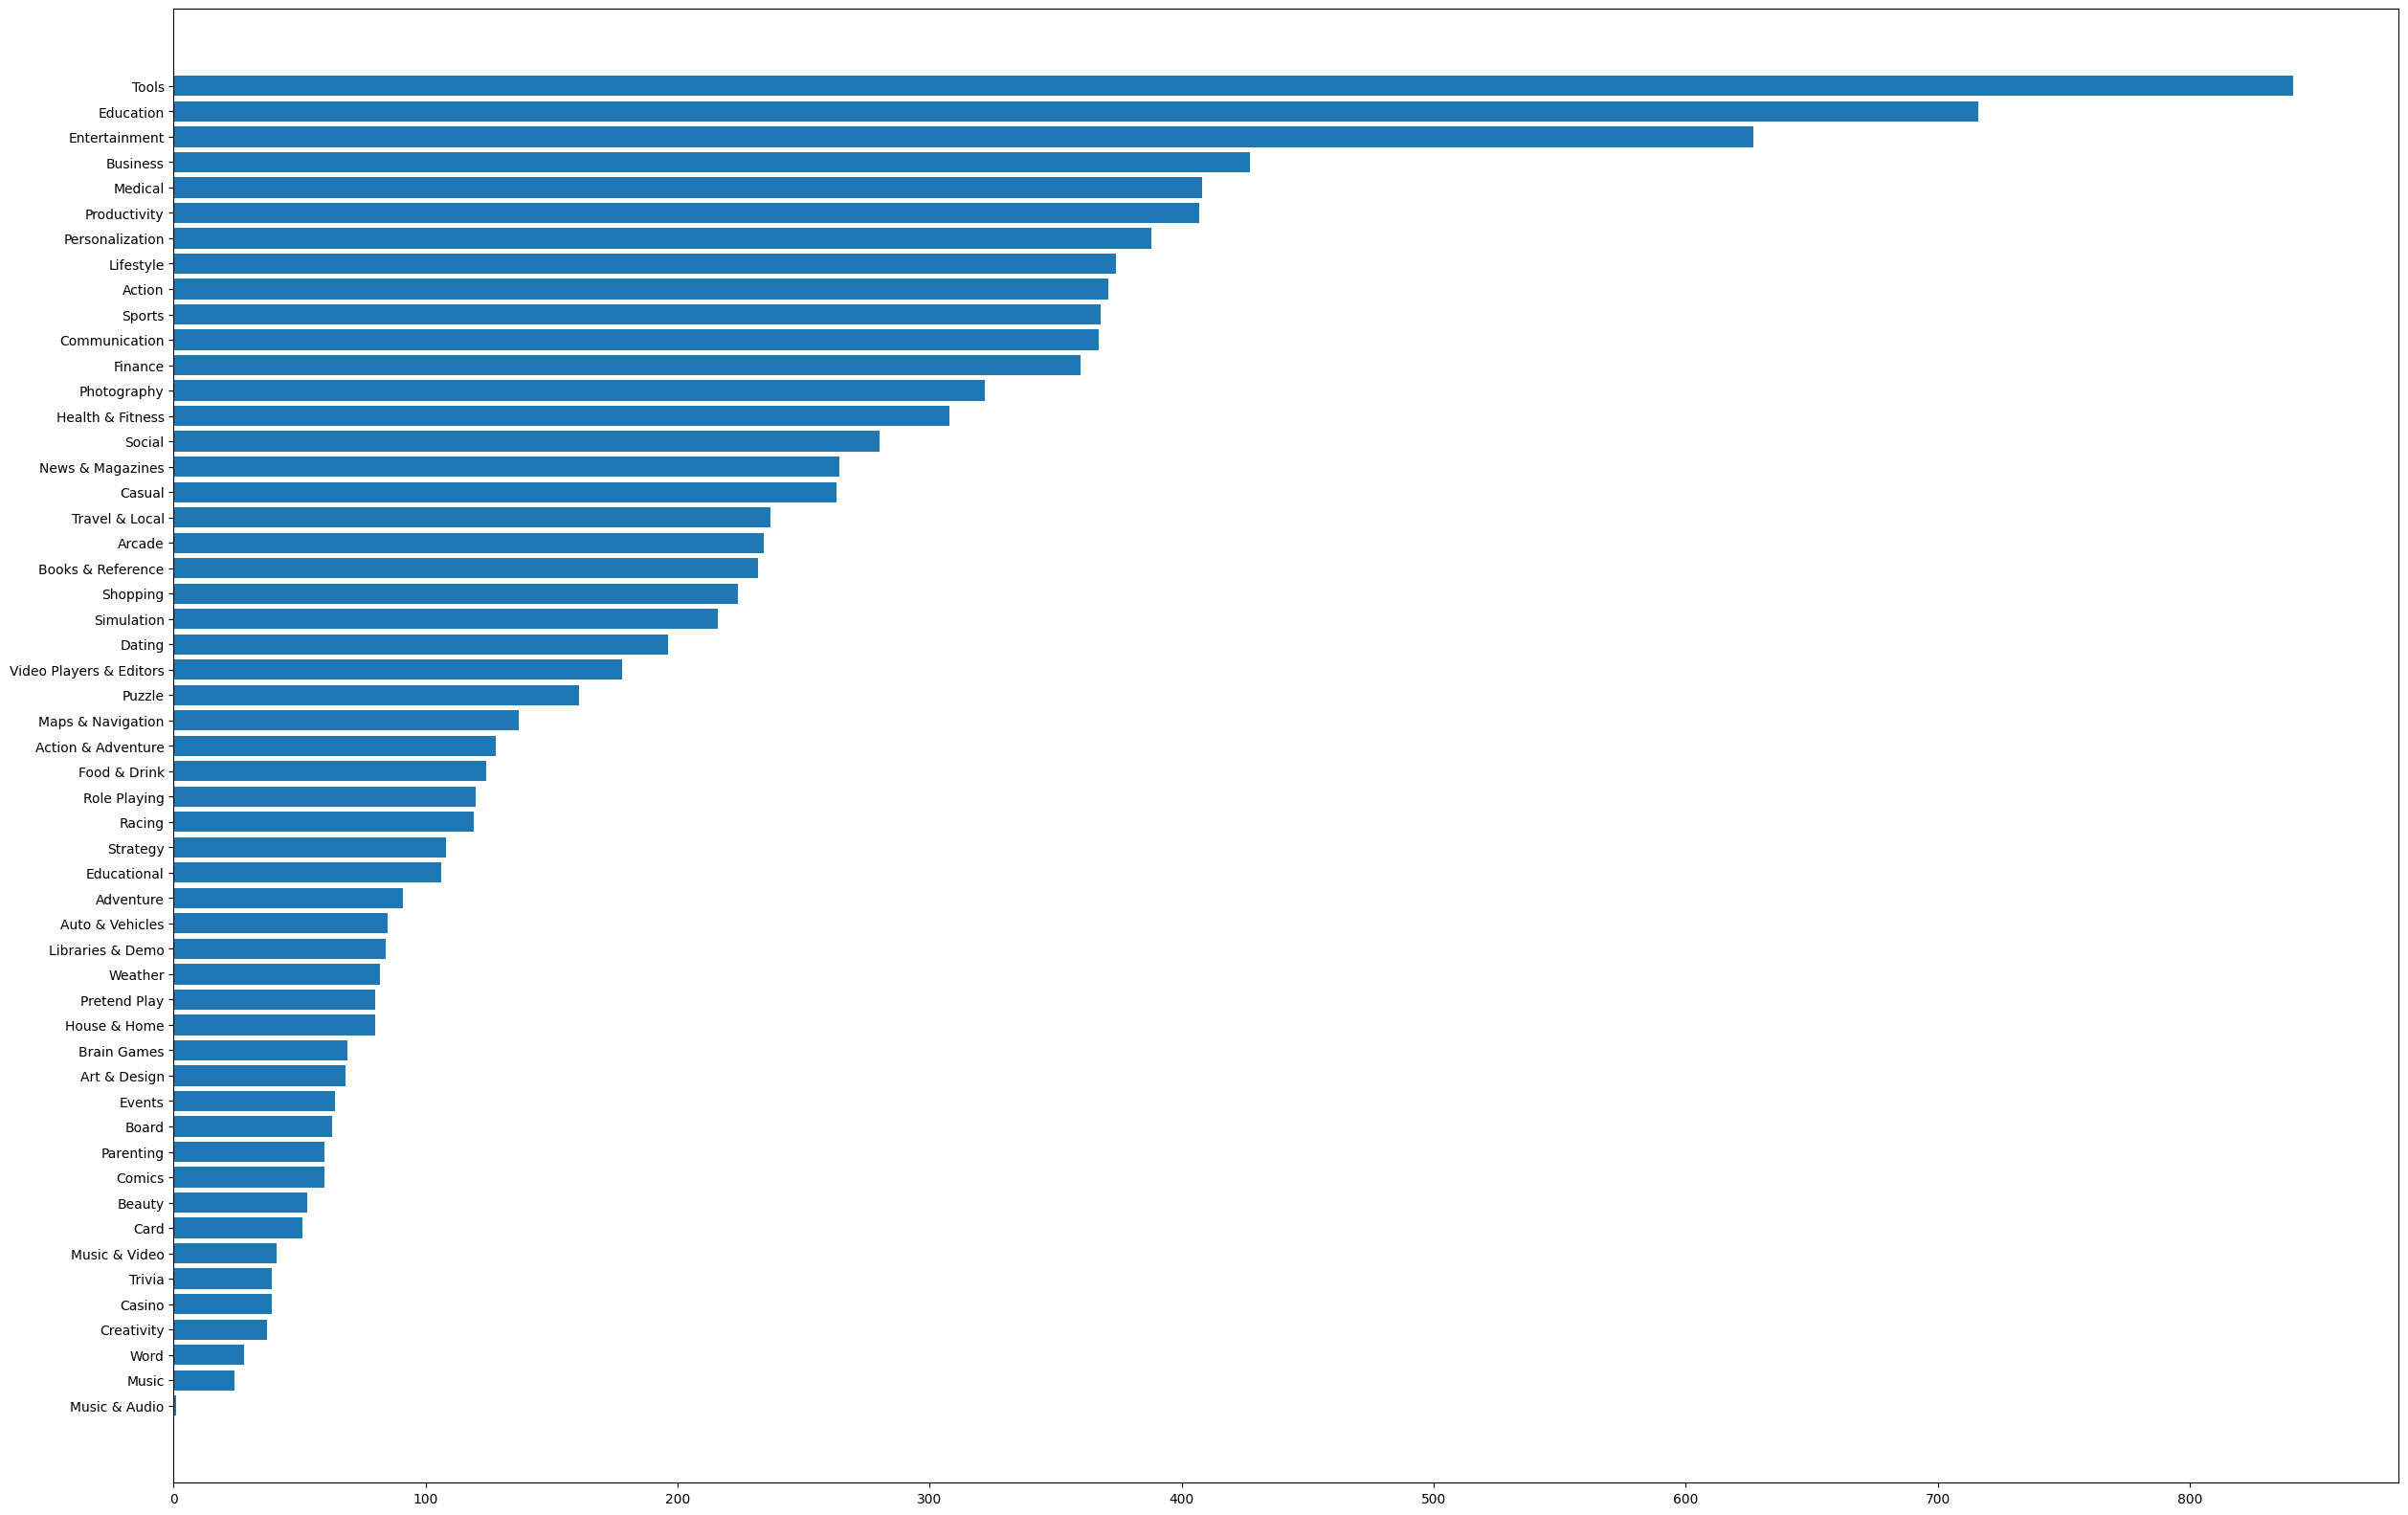

In [297]:
df_exploded=df.explode('Genres')
fig ,ax=plt.subplots(figsize=(30,20))

ax.barh(df_exploded.Genres.value_counts().index,df_exploded.Genres.value_counts().values)
ax.invert_yaxis()

3.	What is the average size of free vs. paid apps?

Text(0, 0.5, 'size_in_mega_bytes')

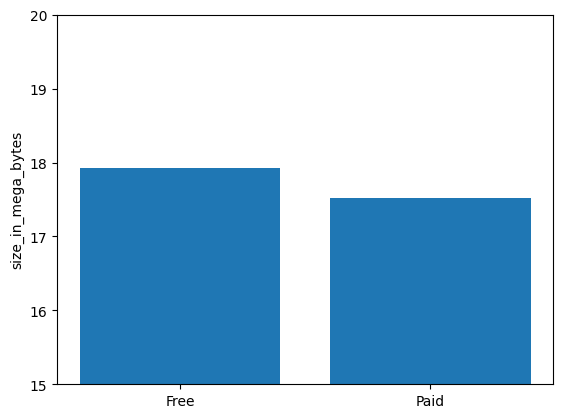

In [298]:
ds=df.groupby(by='Type')['Size'].mean()
plt.bar(ds.index,ds.values)
plt.ylim(15,20)
plt.ylabel("size_in_mega_bytes")

4.	What are the top 5 most expensive apps with a perfect rating (5)?

In [299]:
df[df.Rating==5].sort_values(by='Price',ascending=False).head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Min Android version
5489,AP Art History Flashcards,Family,5.0,1.0,17.894136,10+,Paid,29.99,Mature 17+,[Education],2016-01-19,3.30,4.0.0
7477,USMLE Step 2 CK Flashcards,Family,5.0,1.0,40.000000,10+,Paid,19.99,Everyone,[Education],2014-05-26,2.47,2.2.0
5246,Hey AJ! It's Bedtime!,Family,5.0,1.0,63.000000,10+,Paid,4.99,Everyone,[Education],2018-04-04,1.0.59,2.3.0
5482,meStudying: AP English Lit,Family,5.0,1.0,17.894136,10+,Paid,4.99,Everyone,[Education],2013-08-31,1.3,2.0.1
7204,TI-84 CE Graphing Calculator Manual TI 84,Family,5.0,1.0,27.000000,100+,Paid,4.99,Everyone,[Education],2018-03-28,1.5.2,4.1.0


Text(0, 0.5, 'App')

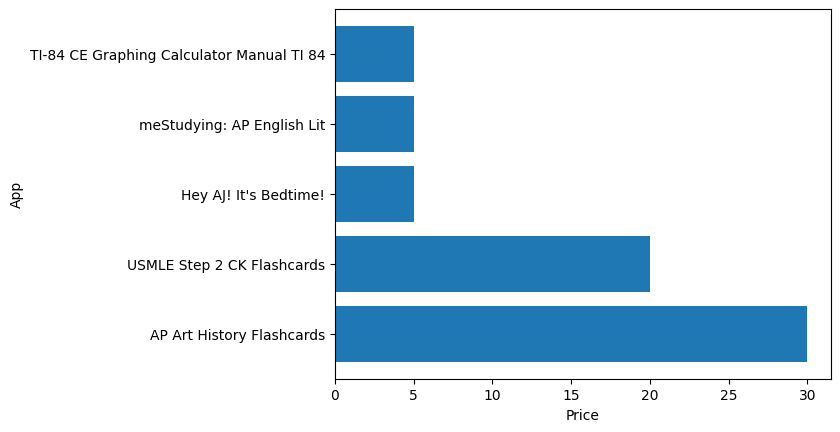

In [300]:
arr=df.loc[df[df.Rating==5].sort_values(by='Price',ascending=False).head(5).index,['App','Price']].values.flatten()
apps=arr[::2]
prices=arr[1::2]
plt.barh(y=apps,width=prices)
plt.xlabel("Price")
plt.ylabel("App")

5.	How many apps have received more than 50K reviews?

In [301]:
mp={"+1K":len(df[df.Reviews>1000]),"+10K":len(df[df.Reviews>10000]),"+50K":len(df[df.Reviews>50000]),"+100K":len(df[df.Reviews>100000])}

In [302]:
print(f"Number of apps with more than 50k reviews is {len(df[df.Reviews>50000])}")

Number of apps with more than 50k reviews is 655


Text(0, 0.5, 'No. of Apps')

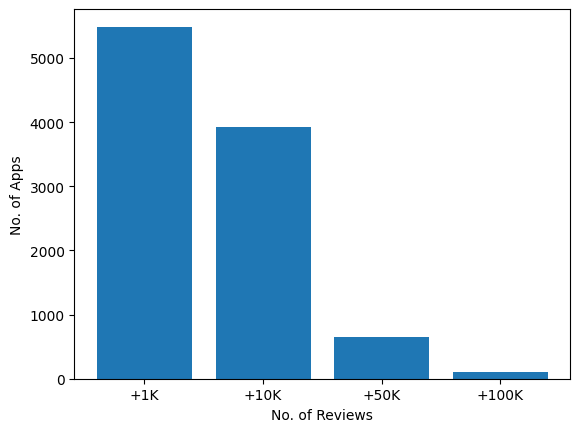

In [303]:
plt.bar(mp.keys(),mp.values())
plt.xlabel("No. of Reviews")
plt.ylabel("No. of Apps")


6.	What is the average price of apps, grouped by genre and number of installs?

In [304]:

avg_price=df_exploded.groupby(['Genres','Installs'])['Price'].mean().reset_index()
avg_price
avg_price=avg_price.pivot(index='Genres',columns='Installs',values='Price')

<Axes: xlabel='Installs', ylabel='Genres'>

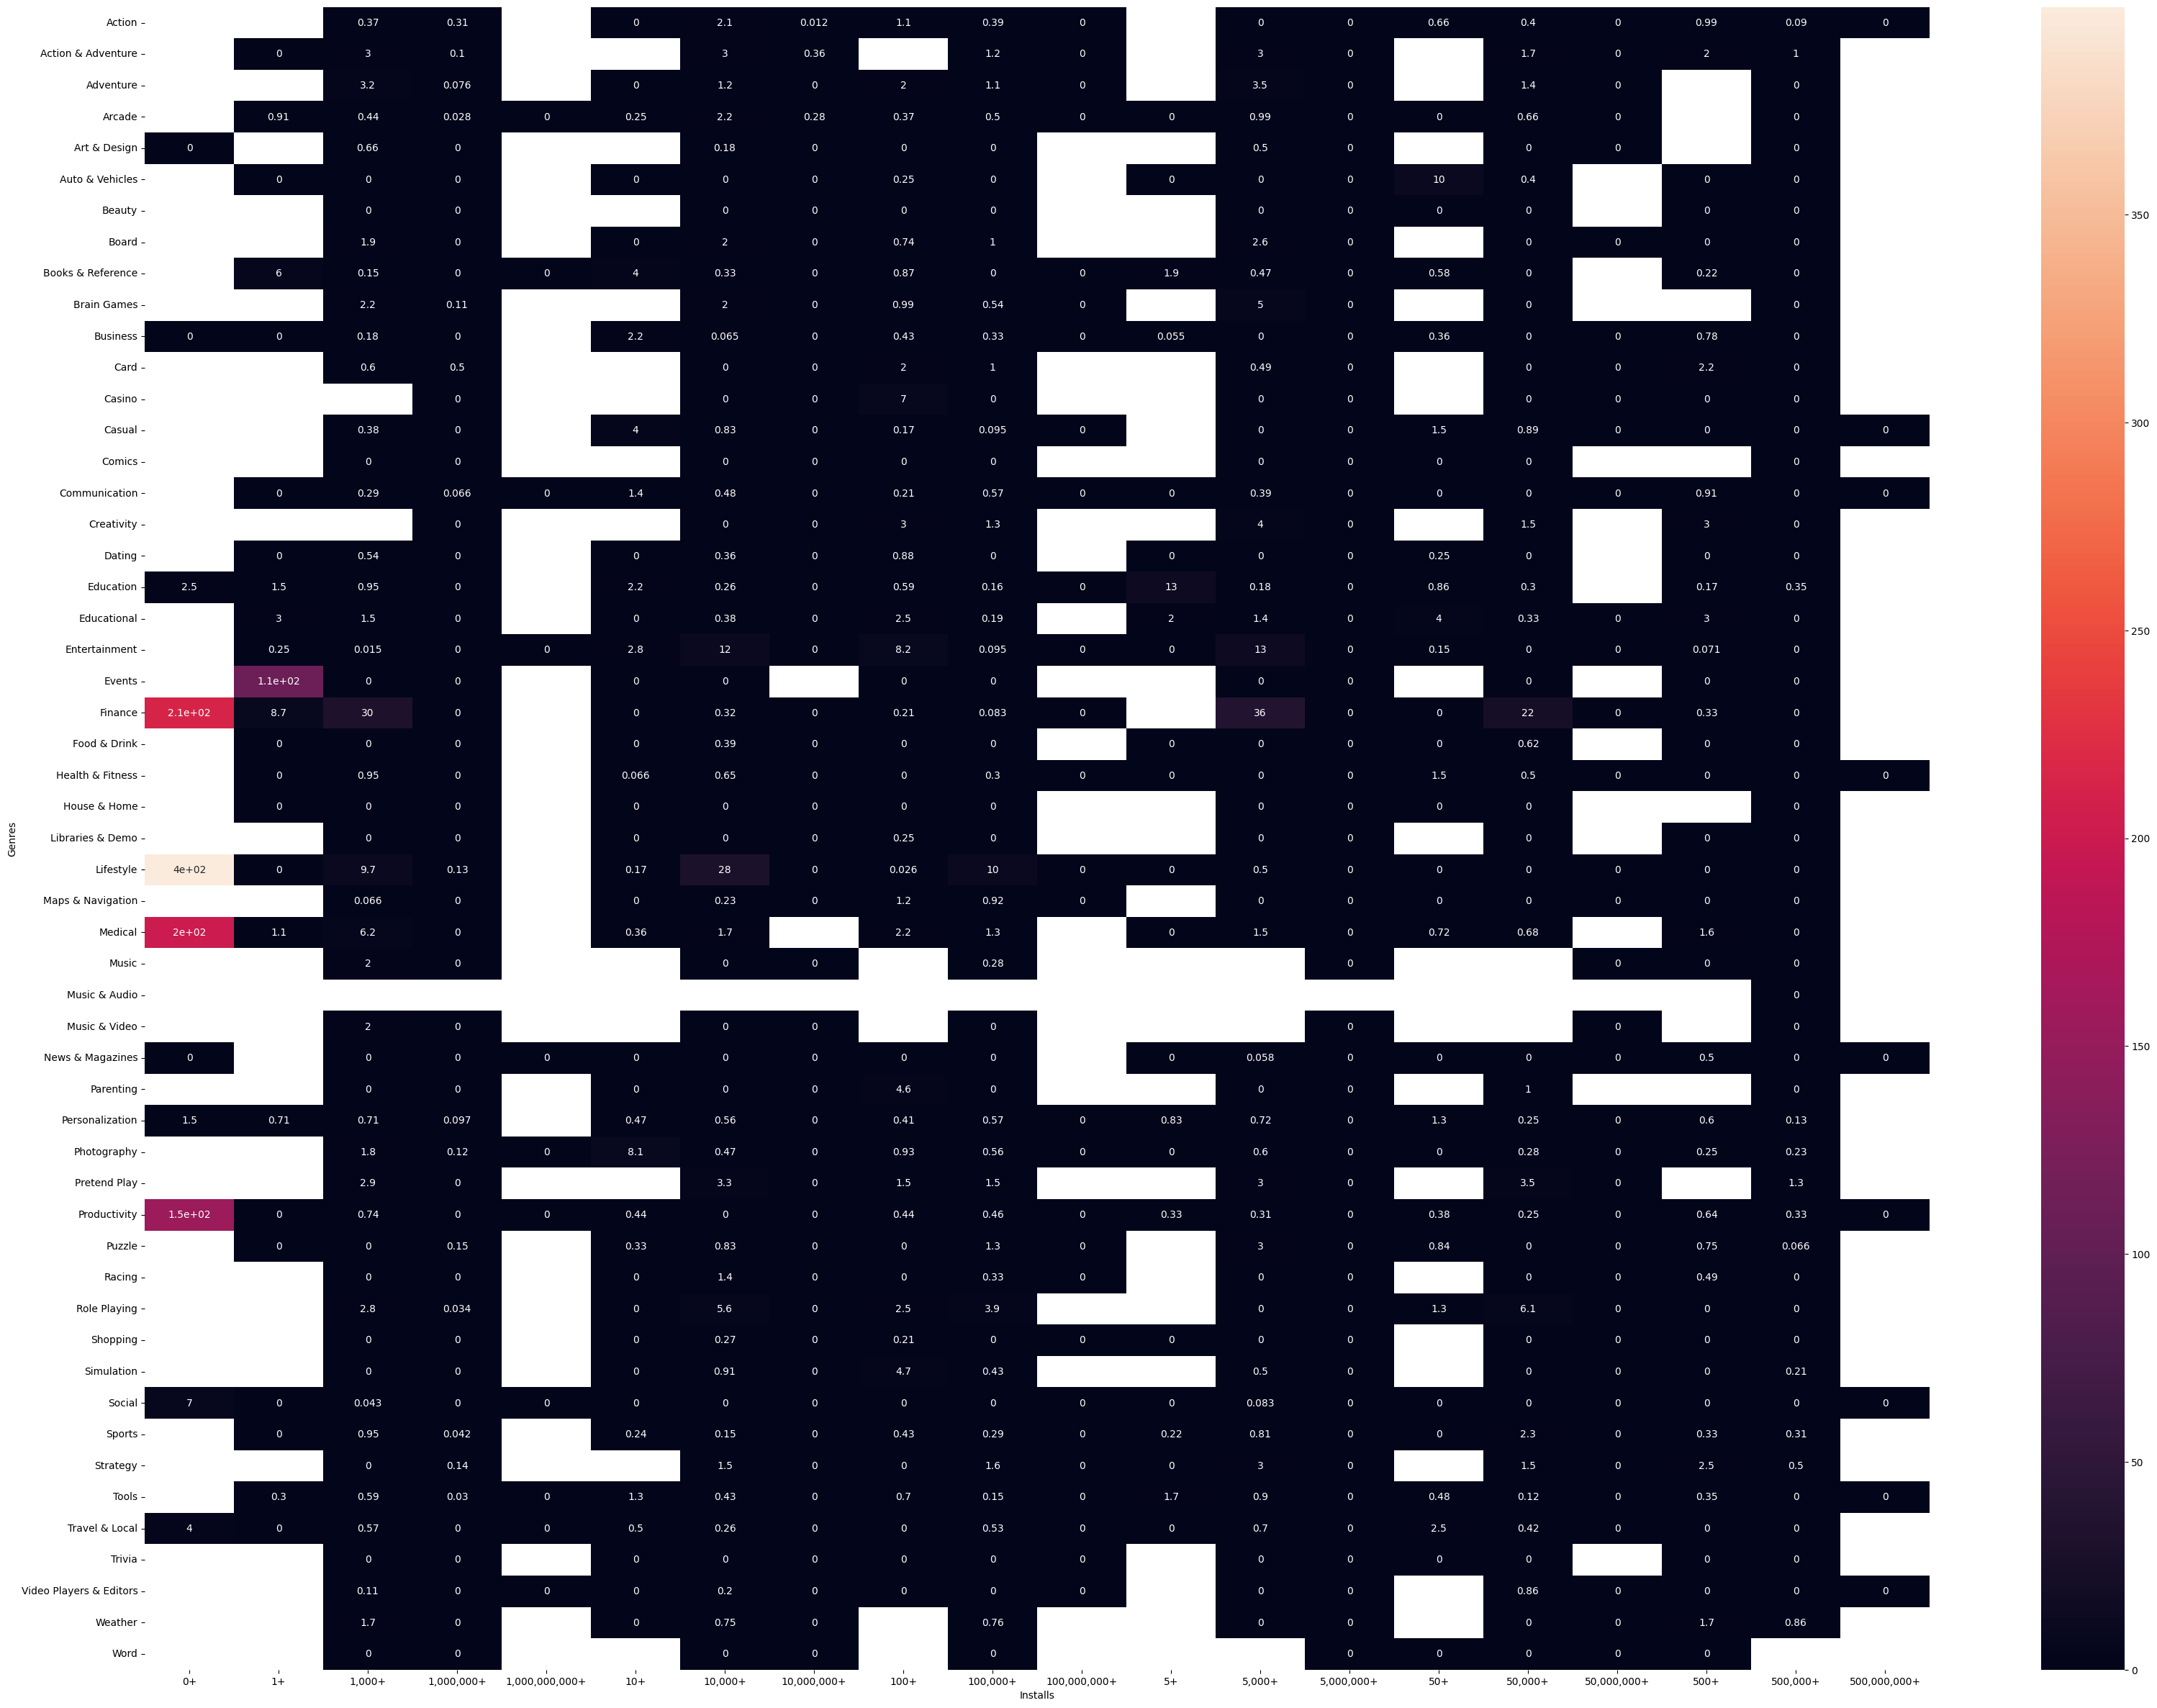

In [305]:
fig ,ax1=plt.subplots(figsize=(40,30))
sns.heatmap(avg_price,annot=True,ax=ax1)

7.	How many apps have a rating higher than 4.7, and what is their average price?

In [306]:
var=df[df.Rating>4.7].Price.mean()
print(f"The average price of apps with rating higher than 4.7 equals : {var}")


The average price of apps with rating higher than 4.7 equals : 0.455


8.	What is Google's estimated revenue from apps with 5,000,000+ installs?
(Assuming Google takes a 30% cut from app sales)


In [307]:
print(f"Google's estimated revenue from apps with 5,000,000+ installs equals : {df[df.Installs=='5,000,000+'].Price.sum()*0.3}")

Google's estimated revenue from apps with 5,000,000+ installs equals : 0.0


9.	What are the maximum and minimum sizes of free vs. paid apps?

Text(0.5, 1.0, 'maximum sizes ')

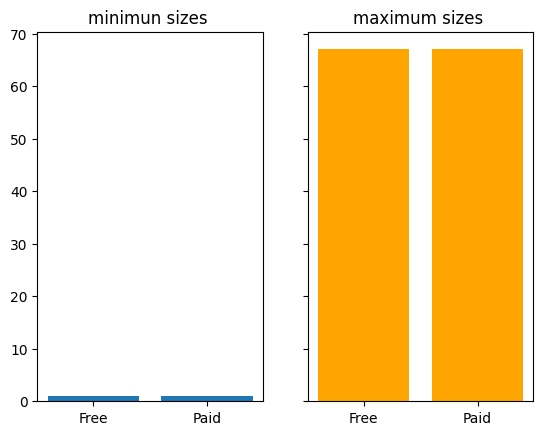

In [308]:
df1=df.groupby(['Type'])['Size'].aggregate(['min','max']).reset_index()
fig ,ax=plt.subplots(ncols=2,sharey=True)
ax[0].bar(list(df1.Type),list(df1['min']))
ax[0].set_title("minimun sizes ")
ax[1].bar(list(df1.Type),list(df1['max']),color='orange')
ax[1].set_title("maximum sizes ")


10.	Is there a correlation between an app’s rating, number of reviews, size, and its price?

Very weak positive corr

<Axes: >

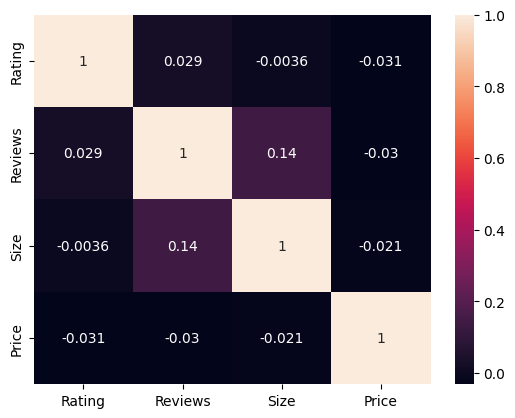

In [309]:
numerics=df.select_dtypes(['int64','float64'])
corr=numerics.corr()
sns.heatmap(data=corr,annot=True)

11.	How many apps exist for each type (free/paid) across different content ratings?

<Axes: xlabel='Content Rating', ylabel='Type'>

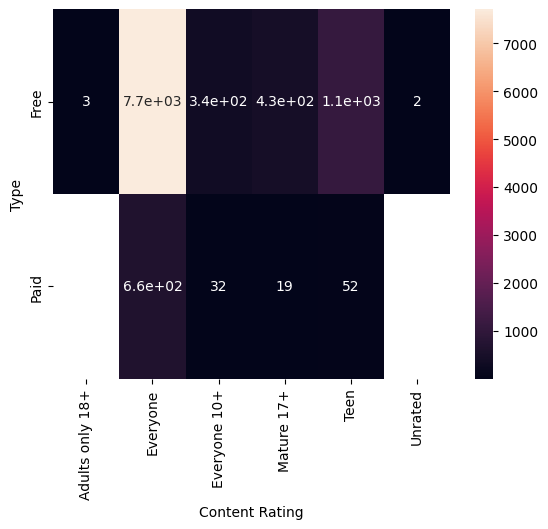

In [310]:
df1=df.groupby('Type')['Content Rating'].value_counts().reset_index()
df1=df1.pivot(index='Type',columns='Content Rating',values='count')
sns.heatmap(df1,annot=True)

12.	How many apps are compatible with Android version 4.x?

In [311]:
print(f"Number of apps compatible with android version 4.x equals :{len(df[df['Min Android version'].str.startswith('4')])}")

Number of apps compatible with android version 4.x equals :7914
